In [ ]:
import numpy as np 
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt 
import  seaborn as sna
from google.colab import files 
uploded = files.upload()
df= pd.read_csv('kidney_disease-1.csv')
df.head(10)

Saving kidney_disease-1.csv to kidney_disease-1 (2).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000.0,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300.0,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,7800.0,4.4,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# Mapping the text to 1/0 and cleaning the dataset 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [ ]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wc       float64
rc       float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object

In [ ]:
df.isna().values.any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    349 non-null    float64
 15  pcv     400 non-null    int64  
 16  wc      397 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Actual numbers in the database')

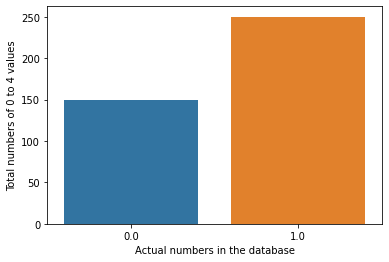

In [ ]:
sna.countplot(df['class'])
plt.ylabel('Total numbers of 0 to 4 values')
plt.xlabel('Actual numbers in the database')

Text(0.5, 0, 'Convert them into 0 and 1')

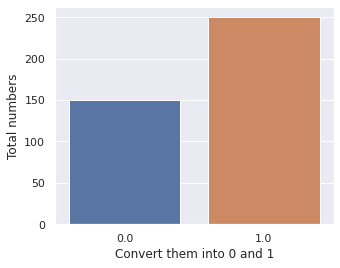

In [ ]:
#sna.countplot(df['Power'], label = 'count')
plt.figure(figsize=(5,4))
sna.set(style="darkgrid")
ax = sna.countplot(x="class", data=df)
plt.ylabel('Total numbers')
plt.xlabel('Convert them into 0 and 1')

In [ ]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      51
pcv        0
wc         3
rc         0
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
s_imputer =SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer =s_imputer.fit(df.iloc[:, 0:15])
df.iloc[:, 0:15]=s_imputer.transform(df.iloc[:, 0:15])

from sklearn.impute import SimpleImputer
s_imputer =SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer =s_imputer.fit(df.iloc[:, 16:17])
df.iloc[:, 16:17]=s_imputer.transform(df.iloc[:, 16:17])

from sklearn.impute import SimpleImputer
s_imputer =SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
s_imputer =s_imputer.fit(df.iloc[:, 18:24])
df.iloc[:, 18:24]=s_imputer.transform(df.iloc[:, 18:24])

In [ ]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

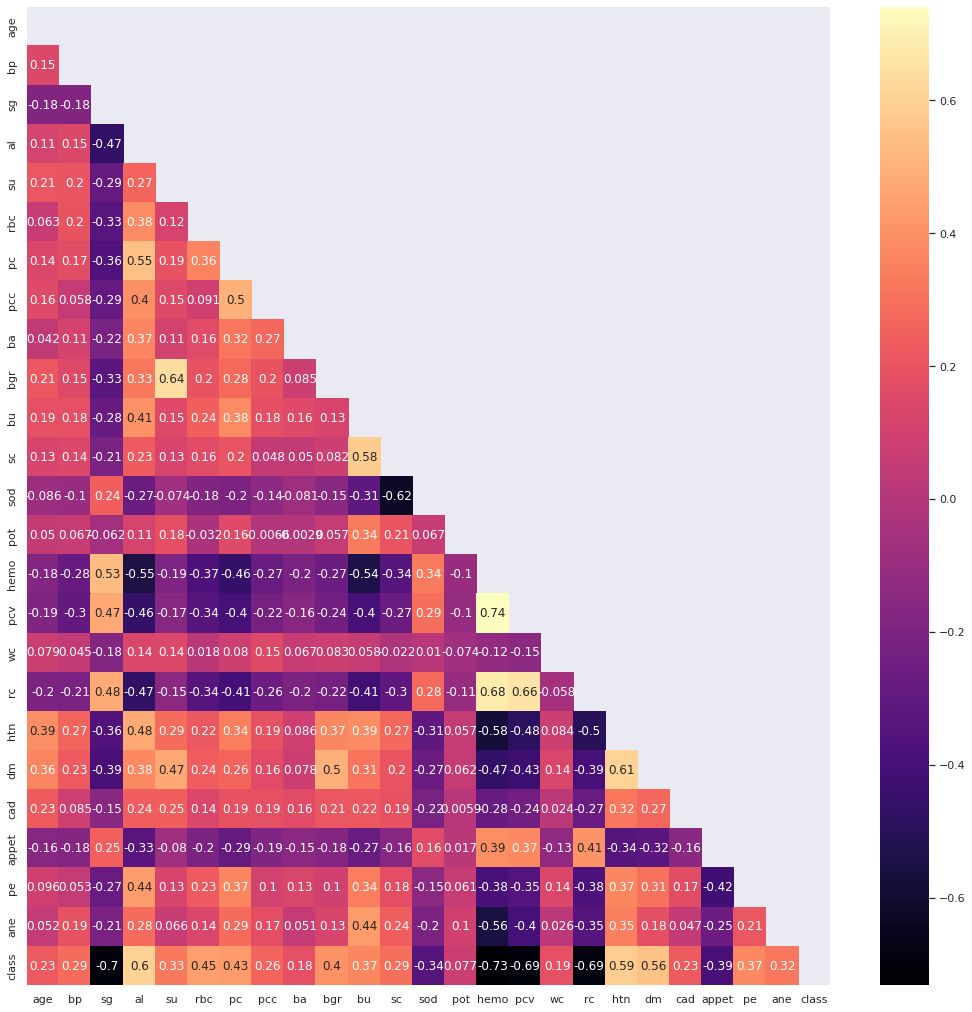

In [ ]:
plt.figure(figsize=(18,18))
matrix = np.triu(df.corr())
sna.heatmap(df.corr(), annot=True,cmap="magma", mask=matrix)
plt.show()

In [ ]:
import pandas as pd
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.522727,0.230769,0.75,0.2,0.0,0.189516,0.000000,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,0.189516,0.000000,0.0,0.0,0.269309,...,0.644444,0.157025,0.525424,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,0.000000,0.000000,0.0,0.0,0.856838,...,0.488889,0.219008,0.525424,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.000000,1.000000,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.000000,0.000000,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.659091,0.307692,0.50,0.6,0.0,0.189516,0.226866,0.0,0.0,0.111111,...,0.666667,0.231405,0.389831,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,0.750000,0.153846,0.25,0.0,0.0,0.189516,0.000000,0.0,0.0,0.166667,...,0.600000,0.231405,0.389831,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.250000,0.203608,0.50,0.4,0.8,0.000000,1.000000,0.0,0.0,0.829060,...,0.777778,0.194215,0.491525,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,0.568182,0.384615,0.50,0.6,0.0,0.000000,1.000000,1.0,0.0,0.247863,...,0.533333,0.305785,0.322034,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,0.579545,0.307692,0.75,0.4,0.0,1.000000,1.000000,1.0,0.0,0.102564,...,0.444444,0.409091,0.271186,1.0,1.0,0.0,0.0,0.0,1.0,1.0
